## ..................Reading the data.....................



In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
     

df = pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [3]:
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


## ......................EDA........................

In [5]:
df.shape

(43152, 11)

In [6]:
df.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

In [7]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
print("\nDataset info:")
print(df.info())

print("\n Missing Values:")
print(df.isnull().sum())

print("\n Duplicate rows")
print(df.duplicated().sum())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB
None

 Missing Values:
Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

 Duplicate rows
0


In [9]:
# Remove rows containing 0 value
df[['z','y', 'x']] = df[['z','y', 'x']].replace(0, np.nan)
df.dropna(inplace=True)

In [10]:
df.shape

(43135, 11)

## ..........Data Analysis and Data Visualization............

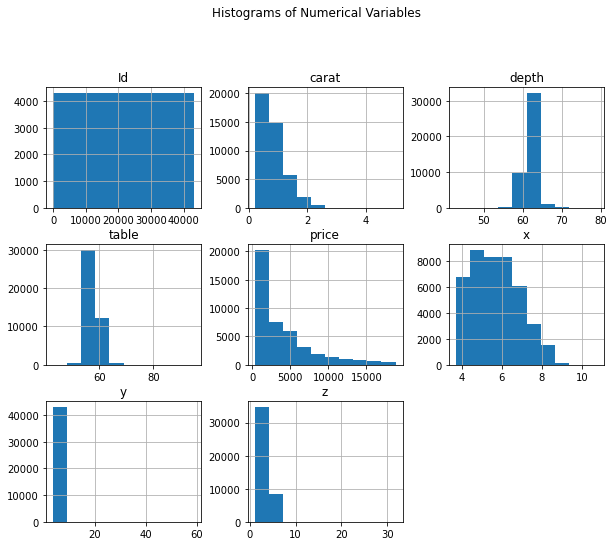

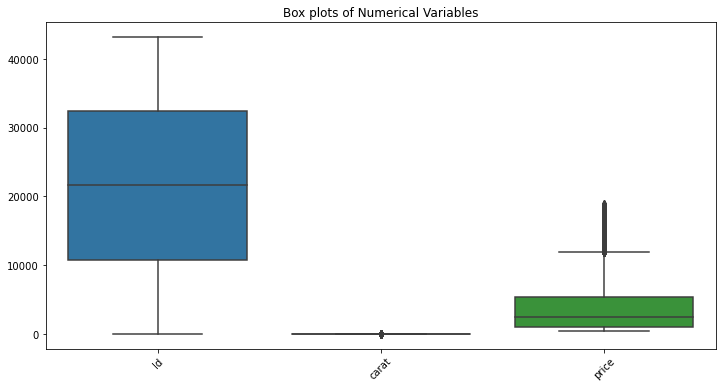

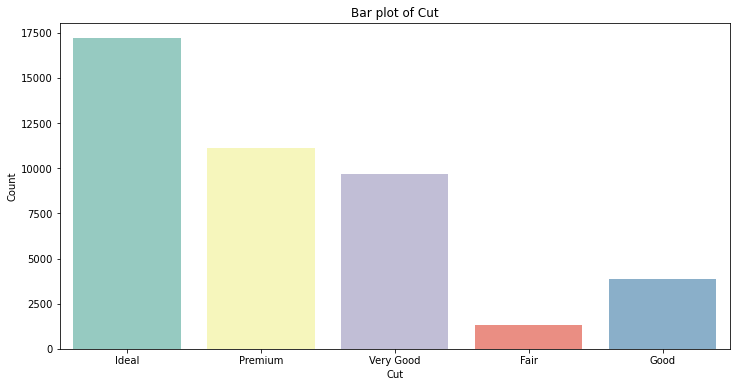

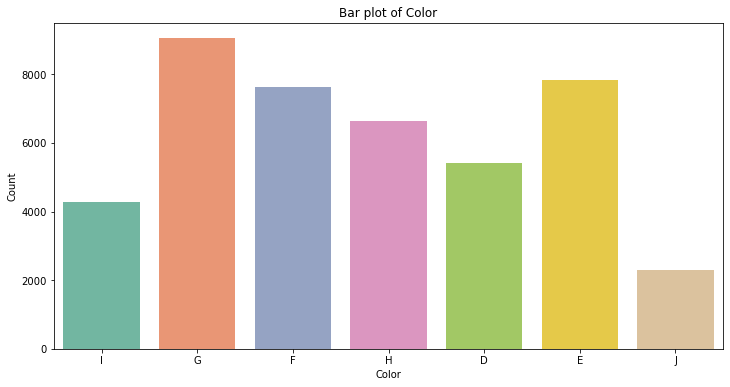

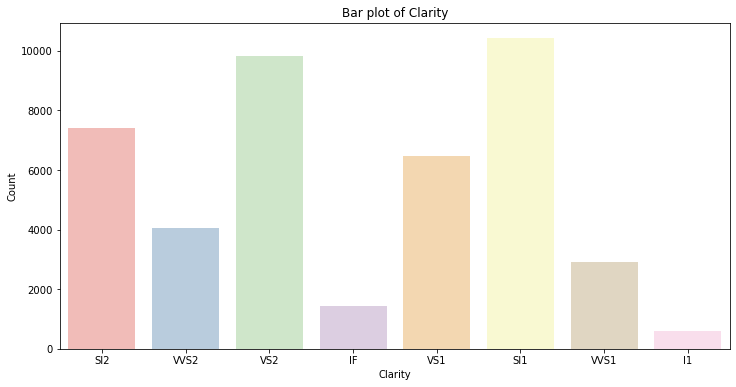

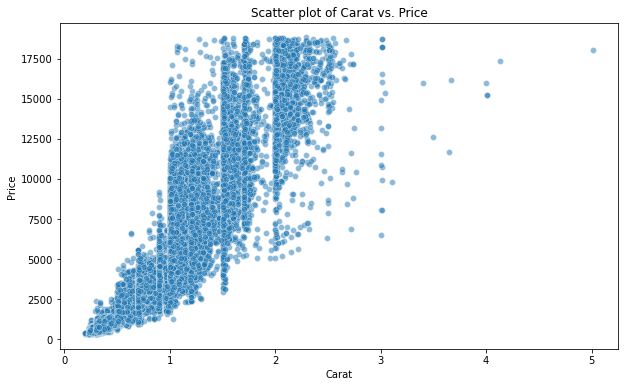

In [11]:

df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Variables', y=1.02)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['depth', 'table', 'x', 'y', 'z']))
plt.title('Box plots of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cut', palette='Set3')
plt.title('Bar plot of Cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='color', palette='Set2')
plt.title('Bar plot of Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='clarity', palette='Pastel1')
plt.title('Bar plot of Clarity')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', alpha=0.5)
plt.title('Scatter plot of Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()


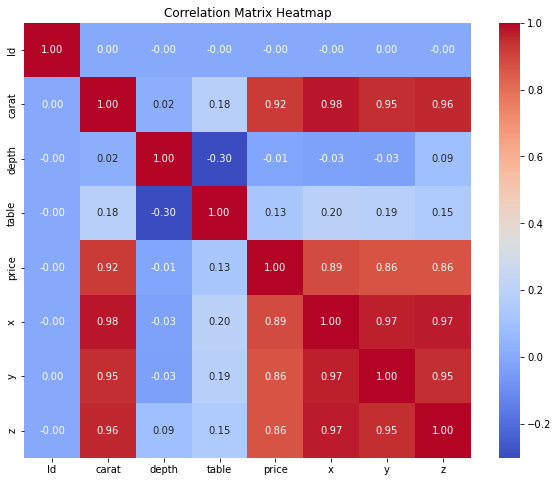

In [12]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

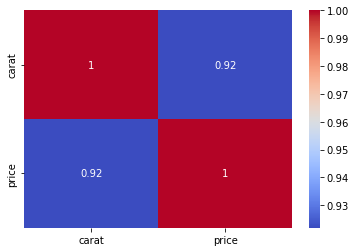

In [13]:
# compute the pairwise correlation matrix
corr_matrix = df[['carat', 'price', 'cut']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

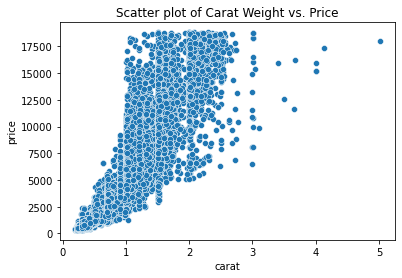

In [14]:
# scatter plot of carat weight vs. price
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Scatter plot of Carat Weight vs. Price')
plt.show()


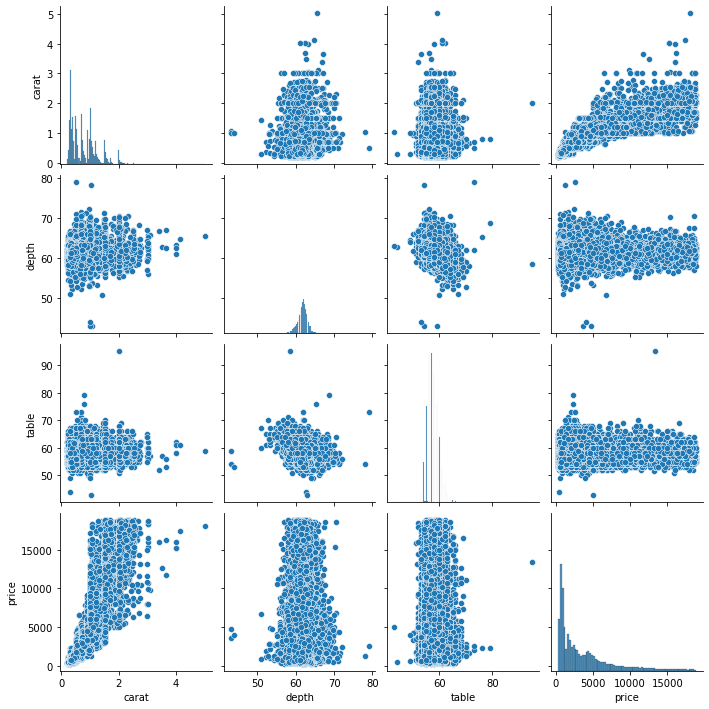

In [15]:
sns.pairplot(df[['carat', 'depth', 'table', 'price']])

## ................Build and Evaluation the model .....................

In [16]:
# Encode categorical columns using LabelEncoder
cat_cols = ['color', 'clarity','cut']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50


In [17]:
#Featuer Scaling
num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [18]:

#Featuer Selection

X = df[['Id', 'carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Linear Regression Model


In [19]:
# Train the model 100 times on different subsets of the data and calculate accuracy and error rate
accuracy_scores = []
error_rates = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    error_rate = mse / y_test.mean()
    accuracy_scores.append(accuracy)
    error_rates.append(error_rate)

print("Average accuracy over 100 iterations:", sum(accuracy_scores) / len(accuracy_scores))
print("Average error rate over 100 iterations:", sum(error_rates) / len(error_rates))

Average accuracy over 100 iterations: 0.8709067070695672
Average error rate over 100 iterations: 521.241438878389




Decision Tree Regressor Model


In [20]:
# Train the model 100 times on different subsets of the data and calculate accuracy and error rate
accuracy_scores = []
error_rates = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model2 = DecisionTreeRegressor()
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)
    accuracy = model2.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    error_rate = mse / y_test.mean()
    accuracy_scores.append(accuracy)
    error_rates.append(error_rate)

print("Average accuracy over 100 iterations:", sum(accuracy_scores) / len(accuracy_scores))
print("Average error rate over 100 iterations:", sum(error_rates) / len(error_rates))


Average accuracy over 100 iterations: 0.9621411126265447
Average error rate over 100 iterations: 153.01924819105466


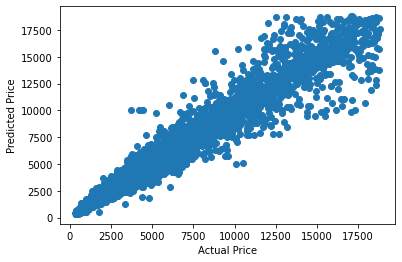

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()
     


### predict target for new data 

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define categorical and numerical columns
cat_cols = ['color', 'clarity','cut']
num_cols_test = ['carat', 'table', 'x', 'y', 'z']

# Encoding categorical features
le = LabelEncoder()
for col in cat_cols:
    test[col] = le.fit_transform(test[col])

# Scaling numerical features
scaler_new = StandardScaler()
test[num_cols_test] = scaler_new.fit_transform(test[num_cols_test])

# Select features from the test data
X_new_test = test[['Id', 'carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z']]

# Predict prices using the trained model
y_pred_test = model2.predict(X_new_test)

# Create a new column in the test data for the predicted prices
test['price'] = y_pred_test

# Select 'Id' column from the test data
id_column = test[['Id']]

# Create a DataFrame for predicted prices with 'Id' column
predicted_prices_df = pd.DataFrame({'Id': id_column['Id'], 'price': y_pred_test})

# Save the DataFrame to a CSV file
predicted_prices_df.to_csv('predicted_prices.csv', index=False)



In [33]:
y_pred_test.shape

(10788,)

In [34]:
y_pred_test

array([  965.,  2982.,   737., ...,  3585.,  4362., 14542.])